<a href="https://colab.research.google.com/github/eh329/Bioinformatics-Projects/blob/main/DrugDiscoverywithPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Drug Discovery 

### Using ChEMBL Database

In [1]:
# Installing libraries

!pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.1 MB/s 
     |████████████████████████████████| 60 kB 6.2 MB/s 
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
  Attempting uninstall: attrs
    Found existing installation: attrs 22.1.0
    Uninstalling attrs-22.1.0:
      Successfully uninstalled attrs-22.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.1.2 which is incompatible.


In [2]:
# Importing libraries

import pandas as pd

from chembl_webresource_client.new_client import new_client

## 1 - Dataset Preparation

In [3]:
# Selection of active compound
# Target seach for active compund

def target_search(act_com):
  """
  Searches ChEMBL database for target protein(s)

  Parameters
  -----------
  act_com: String, name of active compound whose potential targets the user is looking for

  Returns
  -----------
  Pandas dataframe of targets, None if there is not any in the database
  """
  target = new_client.target
  target_query = target.search(act_com)
  targets = pd.DataFrame(target_query)

  if len(targets) > 0:
    return targets

  else:
    return f"No target found!"

# Select and retrieve the bioacitivity for a specific entry

def standard_type(target_index):
  """
  Searches for the activity of a selected target from 
  target_search function.

  Parameters
  -----------
  target_index: Int, number of index for the specific target
                in the target_search fucntion result. 

  Returns
  -----------
  A list, if more than one type, or a string in case of one
  """
  selected_target = target_res.target_chembl_id[target_index]
  activity = new_client.activity
  return activity[0]["standard_type"]


def bioactivity(target_index, standard = "IC50", save = False):
  """
  Searches for the activity of a selected target from 
  target_search function.

  Parameters
  -----------
  target_index: Int, number of index for the specific target
                in the target_search fucntion result. 

  standard: String, the result from standard_type function,
            IC50 by default.
  save: Boolean, if True, saves a csv file in the directory.
        If False, returns the dataframe result. False by defualt.

  Returns
  -----------
  Pandas dataframe of activities for the specific targget from ChEMBL
  """
  selected_target = target_res.target_chembl_id[target_index]
  activity = new_client.activity 
  res = activity.filter(target_chembl_id = selected_target).filter(standard_type = standard)
  df = pd.DataFrame(res)

  if save == False:
    return df

  else:
    df.to_csv("bioactivity_data.csv", index = False)


# Labeling compunds into three different classes:
#                                  active: compunds with value less than 1000 nM
#                                  inactive: compounds with value more than 10000 nM
#                                  intermediate: compunds with value between 1000 - 10000 nM
# This is helpfull for preparing ML model later.

def bioactivity_class(num):
  """
  Takes a number and labels it based on the conditions

  Parameters
  -----------
  num: Int, a number in Pandas series

  Returns
  -----------
  One of the three strings in a particular cell in Pandas series

  """
  if float(num) >= 10000:
    return "inactive"

  elif float(num) <= 1000:
    return "active"

  else:
    return "intermediate"
  

In [4]:
target_res = target_search("coronavirus")
target_res.head()

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,15.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,15.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
4,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859


In [5]:
data = bioactivity(4)
data.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0


In [6]:
# Handling missing values
# Labeling
# Creating a subset

data = data[data["standard_value"].notna()]
data["bioactivity_class"] = data["standard_value"].apply(bioactivity_class)
final_df = data[["molecule_chembl_id", "canonical_smiles",
                 "bioactivity_class", "standard_value"]]

In [7]:
final_df.to_csv("processed_data.csv", index = False)

## 2 - Exploratory Data Analysis

In [8]:
# Install libraries

!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.3 MB 109.2 MB/s 


In [9]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
from scipy.stats import mannwhitneyu

In [10]:
# Calculating Lipniski descriptors

def lipinski(smiles, verbose = False):
  """
  Accepts canonical SMILES of molecules in the dataframe and calculates
  Lipinski descriptors: molecular weight, logarithm of molecular weight, 
                        number of H donors and number of H acceptors.

  Parameters
  -----------
  smiles: Pandas series, containing canonical SMILES data

  Returns
  -----------
  Pandas dataframe containing four Lipinski descriptors
  """
  moldata = []

  for elem in smiles:
    mol = Chem.MolFromSmiles(elem)
    moldata.append(mol)

  baseData = np.arange(1, 1)
  i = 0

  for mol in moldata:
    desc_MolWt = Descriptors.MolWt(mol)
    desc_MolLogP = Descriptors.MolLogP(mol)
    desc_NumHDonors = Lipinski.NumHDonors(mol)
    desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

    row = np.array([desc_MolWt,
                    desc_MolLogP,
                    desc_NumHDonors,
                    desc_NumHAcceptors])
    
    if i == 0:
      baseData = row
    
    else:
      baseData = np.vstack([baseData, row])
    
    i += 1

  columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
  descriptors = pd.DataFrame(data = baseData, columns = columnNames)
  return descriptors

def norm_value(data_num):
  """
  Accepts a numebr and caps it by 100000000

  Parameters
  -----------
  data: Int or float, from a Pandas series

  Returns
  -----------
  Int capped by 100000000
  """
  if data_num > 100000000:
    return  10000000

  else:
    return data_num

def pIC50(data_nano):
  """
  Accpets a data measured to be in nM 
  Convert it into uM

  Parameters
  -----------
  data_nano: Int or float, from a Pandas series

  Returns
  -----------
  Float
  """
  return np.multiply(data_nano, pow(10, -6))
  

def mannwhitney(data, descriptor_col, bioactivity_col,verbos = False):
  """
  Accpets a dataframe, calculates Mann-Whitney U test
  Parameters
  -----------
  data: Pandas dataframe, containing the columns for Lipinsky's desctriptors
        and the column showing the molecules activity level

  descriptor_col: String, name of one of the Lipinsky's descriptor in the data
  bioactivity_col: String, name of the column displaying the level of activity

  Returns
  -----------
  Pandas column containing the U test result and interepretation
  """
  np.random.seed(1)
  selection = [descriptor_col, bioactivity_col]
  df = data[selection]
  active = df[df[bioactivity_col] == "active"]
  active = active[descriptor_col]
  inactive = df[df[bioactivity_col] == "inactive"]
  inactive = inactive[descriptor_col]

  stat, p = mannwhitneyu(active, inactive)
  alpha = 0.05

  if p > alpha:
    inter = "Same distribution (fail to reject H0)"

  else:
    inter = "Different distribution (reject H0)"

  result = pd.DataFrame({"Descriptor": descriptor_col,
                          "Statistics": stat,
                          "p": p,
                          "alpha": alpha,
                          "Interpretation": inter}, index = [0])
  filename = "mannwhitneyu_" + descriptor_col + ".csv"
  result.to_csv(filename)
  return result 

In [11]:
df = pd.read_csv("processed_data.csv")
df.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0


In [12]:
df_lipniski = lipinski(df["canonical_smiles"])
df_lipniski.head()

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0


In [13]:
# Combining the information

df_combined = pd.concat([df, df_lipniski], axis = 1)
df_combined.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0,338.344,3.53900,0.0,5.0


In [14]:
# Cap the numbers in standard value column 
# Convert them from IC50 to pIC50

df_combined["standard_value_norm"] = df_combined["standard_value"].apply(norm_value)
del df_combined["standard_value"]
df_combined["pIC50"] = df_combined["standard_value_norm"].apply(pIC50)
del df_combined["standard_value_norm"]

In [15]:
df_combined.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,0.00720
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,0.00940
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,0.01350
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,0.01311
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,0.00200


In [16]:
df_combined.describe()

,MW,LogP,NumHDonors,NumHAcceptors,pIC50
count,133.000000,133.000000,133.000000,133.000000,133.000000
mean,376.392692,3.908219,0.909774,5.248120,2.154275
std,87.221623,1.385540,0.882993,2.072204,4.068507
min,204.185000,-0.055400,0.000000,2.000000,0.000050
25%,296.366000,3.220320,0.000000,3.000000,0.010700
50%,369.515000,3.769900,1.000000,5.000000,0.023500
75%,437.437000,4.667120,2.000000,6.000000,0.300000
max,588.635000,7.051540,3.000000,12.000000,10.000000


In [17]:
# Comparing the two active and inactive classes
# Removing intermediate class

df_2class = df_combined[df_combined["bioactivity_class"] != "intermediate"]
df_2class.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.6605,0.0,4.0,0.01350
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.6308,0.0,3.0,0.01311
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.3933,0.0,3.0,0.00098
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.2354,0.0,3.0,0.00095
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.2842,0.0,3.0,0.01120


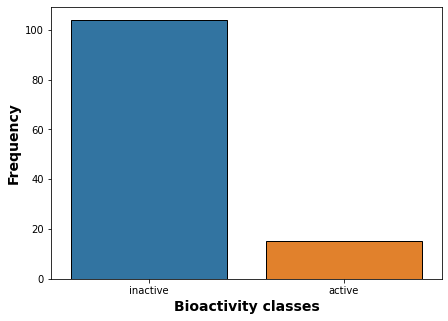

In [18]:
# Plotting the frequency of the two classes

plt.figure(figsize = (7, 5))
sns.countplot(x = "bioactivity_class",
              data = df_2class,
              edgecolor = "black")
plt.xlabel("Bioactivity classes", fontsize = 14, fontweight = "bold")
plt.ylabel("Frequency", fontsize = 14, fontweight = "bold")
plt.show()

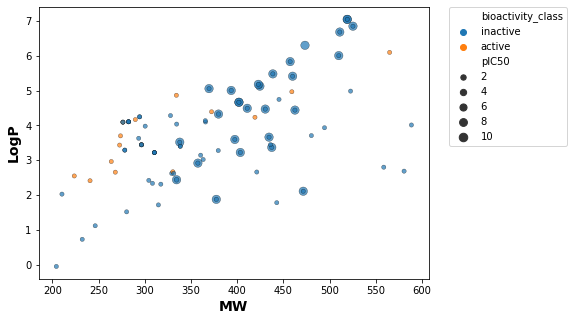

In [19]:
# Plotting MW vs LogP

plt.figure(figsize = (7, 5))
sns.scatterplot(x = "MW", y = "LogP", data = df_2class,
                hue = "bioactivity_class", size = "pIC50",
                edgecolor = "black", alpha = 0.7)
plt.xlabel("MW", fontsize = 14, fontweight = "bold")
plt.ylabel("LogP", fontsize = 14, fontweight = "bold")
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.show()

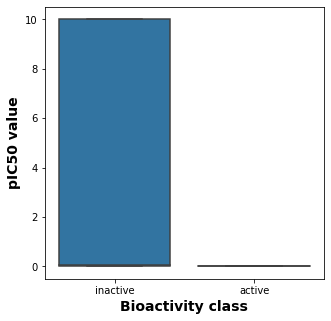

In [20]:
# Plotting pIC50 value

plt.figure(figsize = (5, 5))
sns.boxplot(x = "bioactivity_class", y = "pIC50",
            data = df_2class)
plt.xlabel("Bioactivity class", fontsize = 14, fontweight = "bold")
plt.ylabel("pIC50 value", fontsize = 14, fontweight = "bold")
plt.show()

In [21]:
pic50 = mannwhitney(df_2class, "pIC50", "bioactivity_class")
print(pic50)

  Descriptor  Statistics             p  alpha  \
0      pIC50         0.0  3.325272e-10   0.05   

                       Interpretation  
0  Different distribution (reject H0)  


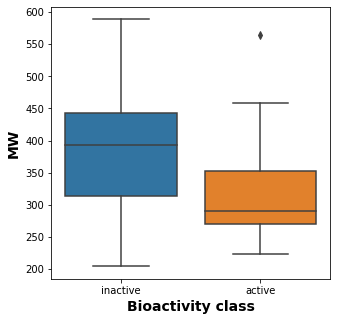


  Descriptor  Statistics         p  alpha                      Interpretation
0         MW       409.5  0.003049   0.05  Different distribution (reject H0)


In [22]:
plt.figure(figsize = (5, 5))
sns.boxplot(x = "bioactivity_class", y = "MW", data = df_2class)
plt.xlabel("Bioactivity class", fontsize = 14, fontweight = "bold")
plt.ylabel("MW", fontsize = 14, fontweight = "bold")
plt.show()

print()
mw = mannwhitney(df_2class, "MW", "bioactivity_class")
print(mw)

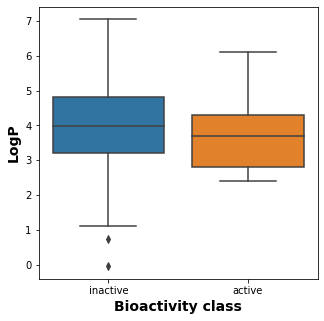


  Descriptor  Statistics         p  alpha  \
0       LogP       712.5  0.591609   0.05   

                          Interpretation  
0  Same distribution (fail to reject H0)  


In [23]:
plt.figure(figsize = (5, 5))
sns.boxplot(x = "bioactivity_class", y = "LogP", data = df_2class)
plt.xlabel("Bioactivity class", fontsize = 14, fontweight = "bold")
plt.ylabel("LogP", fontsize = 14, fontweight = "bold")
plt.show()

print()
logp = mannwhitney(df_2class, "LogP", "bioactivity_class")
print(logp)

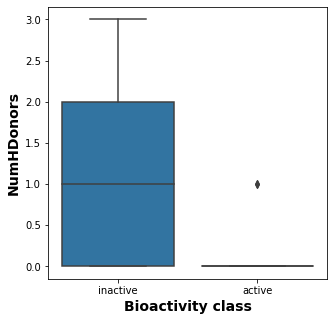


   Descriptor  Statistics         p  alpha                      Interpretation
0  NumHDonors       299.5  0.000049   0.05  Different distribution (reject H0)


In [24]:
plt.figure(figsize = (5, 5))
sns.boxplot(x = "bioactivity_class", y = "NumHDonors", data = df_2class)
plt.xlabel("Bioactivity class", fontsize = 14, fontweight = "bold")
plt.ylabel("NumHDonors", fontsize = 14, fontweight = "bold")
plt.show()

print()
hdonors = mannwhitney(df_2class, "NumHDonors", "bioactivity_class")
print(hdonors)

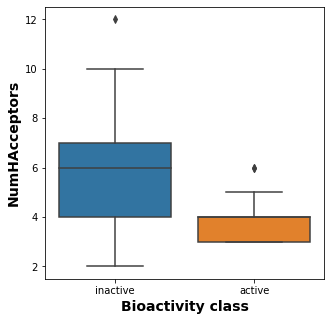


      Descriptor  Statistics         p  alpha  \
0  NumHAcceptors       415.0  0.003115   0.05   

                       Interpretation  
0  Different distribution (reject H0)  


In [25]:
plt.figure(figsize = (5, 5))
sns.boxplot(x = "bioactivity_class", y = "NumHAcceptors", data = df_2class)
plt.xlabel("Bioactivity class", fontsize = 14, fontweight = "bold")
plt.ylabel("NumHAcceptors", fontsize = 14, fontweight = "bold")
plt.show()

print()
hacceptors = mannwhitney(df_2class, "NumHAcceptors", "bioactivity_class")
print(hacceptors)

In [26]:
full_res = pd.concat([pic50, mw, logp, hdonors, hacceptors])
full_res.to_csv("mattwhitney.csv", index = False)

## 3 - Preprocessing

In [27]:
# Downloading PaDEL-Descriptor

! wget https://github.com/eh329/Bioinformatics-Projects/raw/main/padel.zip
! wget https://github.com/eh329/Bioinformatics-Projects/raw/main/padel.sh

--2022-12-28 15:32:41--  https://github.com/eh329/Bioinformatics-Projects/raw/main/padel.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/eh329/Bioinformatics-Projects/main/padel.zip [following]
--2022-12-28 15:32:41--  https://raw.githubusercontent.com/eh329/Bioinformatics-Projects/main/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   161MB/s    in 0.2s    

2022-12-28 15:32:42 (161 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2022-12-28 15:32:42--  https://github.co

In [28]:
!unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [29]:
df_combined.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,0.00720
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,0.00940
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,0.01350
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,0.01311
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,0.00200


In [30]:
df3 = df_combined.copy()
df3_selection = df3[["canonical_smiles", "molecule_chembl_id"]]
df3_selection.to_csv("molecule.smi", sep = "\t", index = False, header = False)

In [31]:
! cat molecule.smi | head -5

Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21	CHEMBL187579
O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21	CHEMBL188487
O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21	CHEMBL185698
O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21	CHEMBL426082
O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]	CHEMBL187717


In [32]:
! cat molecule.smi | wc -l

133


In [33]:
! bash padel.sh

Processing CHEMBL187579 in molecule.smi (1/133). 
Processing CHEMBL188487 in molecule.smi (2/133). 
Processing CHEMBL185698 in molecule.smi (3/133). Average speed: 3.99 s/mol.
Processing CHEMBL426082 in molecule.smi (4/133). Average speed: 2.08 s/mol.
Processing CHEMBL187717 in molecule.smi (5/133). Average speed: 1.70 s/mol.
Processing CHEMBL365134 in molecule.smi (6/133). Average speed: 1.35 s/mol.
Processing CHEMBL187598 in molecule.smi (7/133). Average speed: 1.27 s/mol.
Processing CHEMBL190743 in molecule.smi (8/133). Average speed: 1.15 s/mol.
Processing CHEMBL365469 in molecule.smi (9/133). Average speed: 1.28 s/mol.
Processing CHEMBL188983 in molecule.smi (10/133). Average speed: 1.16 s/mol.
Processing CHEMBL191575 in molecule.smi (11/133). Average speed: 0.96 s/mol.
Processing CHEMBL194398 in molecule.smi (13/133). Average speed: 0.88 s/mol.
Processing CHEMBL370923 in molecule.smi (12/133). Average speed: 0.92 s/mol.
Processing CHEMBL196635 in molecule.smi (14/133). Average sp

In [34]:
! ls -l

total 25472
-rw-r--r-- 1 root root   247688 Dec 28 15:33 descriptors_output.csv
drwxr-xr-x 3 root root     4096 Dec 28 15:32 __MACOSX
-rw-r--r-- 1 root root      121 Dec 28 15:32 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      118 Dec 28 15:32 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      130 Dec 28 15:32 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      128 Dec 28 15:32 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      120 Dec 28 15:32 mannwhitneyu_pIC50.csv
-rw-r--r-- 1 root root      422 Dec 28 15:32 mattwhitney.csv
-rw-r--r-- 1 root root     7991 Dec 28 15:32 molecule.smi
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor
-rw-r--r-- 1 root root      231 Dec 28 15:32 padel.sh
-rw-r--r-- 1 root root 25768637 Dec 28 15:32 padel.zip
-rw-r--r-- 1 root root    10578 Dec 28 15:32 processed_data.csv
drwxr-xr-x 1 root root     4096 Dec 20 20:19 sample_data


In [35]:
df3_x = pd.read_csv("descriptors_output.csv")
df3_x.head()

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL187579,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL188487,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL185698,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL426082,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL187717,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df3_x = df3_x.drop(columns = ["Name"])
df3_y = df3["pIC50"]
dataset = pd.concat([df3_x, df3_y], axis = 1)
#dataset.to_csv("acetylcholinesterase_06_bioactivity_data_pIC50.csv", index = False)

## Model Building

In [46]:
# Import libraries

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  HistGradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import GammaRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [38]:
! wget https://github.com/eh329/Bioinformatics-Projects/raw/main/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2022-12-28 15:33:32--  https://github.com/eh329/Bioinformatics-Projects/raw/main/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/eh329/Bioinformatics-Projects/main/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2022-12-28 15:33:33--  https://raw.githubusercontent.com/eh329/Bioinformatics-Projects/main/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity

In [39]:
# Seaparating feature and target data 

dataset = pd.read_csv("acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv")
x = dataset.drop("pIC50", axis = 1)
y = dataset["pIC50"]

# Removing low variance features

selection = VarianceThreshold(threshold = (0.8 * (1 - 0.8)))
x = selection.fit_transform(x)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, random_state = 69)

In [41]:
np.random.seed(70)
model = RandomForestRegressor(n_estimators = 100)
model.fit(x_train, y_train)
r2 = model.score(x_test, y_test)

In [42]:
print(f"R squarred: {r2}")
y_pred = model.predict(x_test)

R squarred: 0.4763104437147755


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


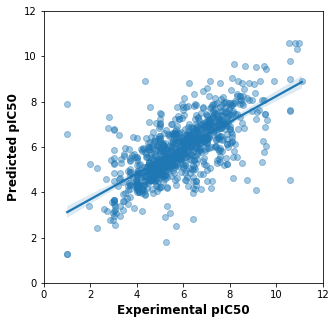

In [43]:
ax = sns.regplot(y_test, y_pred, scatter_kws = {"alpha": 0.4})
ax.set_xlabel("Experimental pIC50", fontsize = "large", fontweight = "bold")
ax.set_ylabel("Predicted pIC50", fontsize = "large", fontweight = "bold")
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()

## Comparing models

In [47]:
# Random Forrest Regressor

np.random.seed(70)
RFR_model = RandomForestRegressor(n_estimators = 100)
RFR_model.fit(x_train, y_train)
RFR_y_pred = RFR_model.predict(x_test)
RFR_score = RFR_model.score(x_test, y_test)
RFR_rmse = np.sqrt(mean_squared_error(y_test, RFR_y_pred))

# Hist Gradient Bossting Regressor

HGBR_model = HistGradientBoostingRegressor()
HGBR_model.fit(x_train, y_train)
HGBR_y_pred = HGBR_model.predict(x_test)
HGBR_score = HGBR_model.score(x_test, y_test)
HGBR_rmse = np.sqrt(mean_squared_error(y_test, HGBR_y_pred))

# Bagging Regressor

BR_model = BaggingRegressor(n_estimators = 100)
BR_model.fit(x_train, y_train)
BR_y_pred = BR_model.predict(x_test)
BR_score = BR_model.score(x_test, y_test)
BR_rmse = np.sqrt(mean_squared_error(y_test, BR_y_pred))

# Support Vector Regressor

SVR_model = SVR()
SVR_model.fit(x_train, y_train)
SVR_y_pred = SVR_model.predict(x_test)
SVR_score = SVR_model.score(x_test, y_test)
SVR_rmse = np.sqrt(mean_squared_error(y_test, SVR_y_pred))

# Nu Support Vector Regressor

nuSVR_model = NuSVR()
nuSVR_model.fit(x_train, y_train)
nuSVR_y_pred = nuSVR_model.predict(x_test)
nuSVR_score = nuSVR_model.score(x_test, y_test)
nuSVR_rmse = np.sqrt(mean_squared_error(y_test, nuSVR_y_pred))

# Linear Support Vector Regressor

LSVR_model = LinearSVR()
LSVR_model.fit(x_train, y_train)
LSVR_y_pred = LSVR_model.predict(x_test)
LSVR_score = LSVR_model.score(x_test, y_test)
LSVR_rmse = np.sqrt(mean_squared_error(y_test, LSVR_y_pred))

# Extra Tree Regressor

ETR_model = ExtraTreeRegressor()
ETR_model.fit(x_train, y_train)
ETR_y_pred = ETR_model.predict(x_test)
ETR_score = ETR_model.score(x_test, y_test)
ETR_rmse = np.sqrt(mean_squared_error(y_test, ETR_y_pred))

# Decision Tree Regressor

DTR_model = DecisionTreeRegressor()
DTR_model.fit(x_train, y_train)
DTR_y_pred = DTR_model.predict(x_test)
DTR_score = DTR_model.score(x_test, y_test)
DTR_rmse = np.sqrt(mean_squared_error(y_test, DTR_y_pred))

# Gamma Regressor

GR_model = GammaRegressor()
GR_model.fit(x_train, y_train)
GR_y_pred = GR_model.predict(x_test)
GR_score = GR_model.score(x_test, y_test)
GR_rmse = np.sqrt(mean_squared_error(y_test, GR_y_pred))

# Linear Regressor

LR_model = LinearRegression()
LR_model.fit(x_train, y_train)
LR_y_pred = LR_model.predict(x_test)
LR_score = LR_model.score(x_test, y_test)
LR_rmse = np.sqrt(mean_squared_error(y_test, LR_y_pred))

# Ridge Regressor

R_model = Ridge()
R_model.fit(x_train, y_train)
R_y_pred = R_model.predict(x_test)
R_score = R_model.score(x_test, y_test)
R_rmse = np.sqrt(mean_squared_error(y_test, R_y_pred))

# Ridge Regressor + corss validation

RCV_model = RidgeCV()
RCV_model.fit(x_train, y_train)
RCV_y_pred = RCV_model.predict(x_test)
RCV_score = RCV_model.score(x_test, y_test)
RCV_rmse = np.sqrt(mean_squared_error(y_test, RCV_y_pred))

# Baysian Ridge Regressor

BR_model = BayesianRidge()
BR_model.fit(x_train, y_train)
BR_y_pred = BR_model.predict(x_test)
BR_score = BR_model.score(x_test, y_test)
BR_rmse = np.sqrt(mean_squared_error(y_test, BR_y_pred))

# Lasso Lars Regressor

LL_model = LassoLars()
LL_model.fit(x_train, y_train)
LL_y_pred = LL_model.predict(x_test)
LL_score = LL_model.score(x_test, y_test)
LL_rmse = np.sqrt(mean_squared_error(y_test, LL_y_pred))

# Lasso Regressor + cross vlaidation

LCV_model = LassoCV()
LCV_model.fit(x_train, y_train)
LCV_y_pred = LCV_model.predict(x_test)
LCV_score = LCV_model.score(x_test, y_test)
LCV_rmse = np.sqrt(mean_squared_error(y_test, LCV_y_pred))

# Huber Regressor

HR_model = HuberRegressor()
HR_model.fit(x_train, y_train)
HR_y_pred = HR_model.predict(x_test)
HR_score = HR_model.score(x_test, y_test)
HR_rmse = np.sqrt(mean_squared_error(y_test, HR_y_pred))

# Elastic Net

EN_model = ElasticNetCV()
EN_model.fit(x_train, y_train)
EN_y_pred = EN_model.predict(x_test)
EN_score = EN_model.score(x_test, y_test)
EN_rmse = np.sqrt(mean_squared_error(y_test, EN_y_pred))

# K Neighbors Regressor

KNR_model = KNeighborsRegressor()
KNR_model.fit(x_train, y_train)
KNR_y_pred = KNR_model.predict(x_test)
KNR_score = KNR_model.score(x_test, y_test)
KNR_rmse = np.sqrt(mean_squared_error(y_test, KNR_y_pred))

# Multi Layer Perceptro Regressor

MLPR_model = MLPRegressor()
MLPR_model.fit(x_train, y_train)
MLPR_y_pred = MLPR_model.predict(x_test)
MLPR_score = MLPR_model.score(x_test, y_test)
MLPR_rmse = np.sqrt(mean_squared_error(y_test, MLPR_y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWa

In [57]:
# Creating report

data = {"Model": ["Random Forrest Regressor", "Hist Gradient Bossting Regressor", "Bagging Regressor", "SVR",
                  "NuSVR", "LinearSVR", "Extra Tree Regressor", "Decision Tree Regressor", "Gamma Regressor",
                  "Linear Regressor", "Ridge", "RidgeCV", "Baysian Ridge Regressor", "LassoLars Regressor",
                  "LassoCV", "Huber Regressor", "Elastic Net", "KNN Regressor", "MLP Regressor"],
        "R^2": [RFR_score, HGBR_score, BR_score, SVR_score, nuSVR_score, LSVR_score, ETR_score, DTR_score, GR_score,
                LR_score, R_score, RCV_score, BR_score, LL_score, LCV_score, HR_score, EN_score, KNR_score, MLPR_score],
        "RMSE": [RFR_rmse, HGBR_rmse, BR_rmse, SVR_rmse, nuSVR_rmse, LSVR_rmse, ETR_rmse, DTR_rmse, GR_rmse,
                 LR_rmse, R_rmse, RCV_rmse, BR_rmse, LL_rmse, LCV_rmse, HR_rmse, EN_rmse, KNR_rmse, MLPR_rmse]
}

report = pd.DataFrame(data)
report = report.sort_values(by = ["R^2", "RMSE"], ascending = False)

[(0.0, 1.0)]

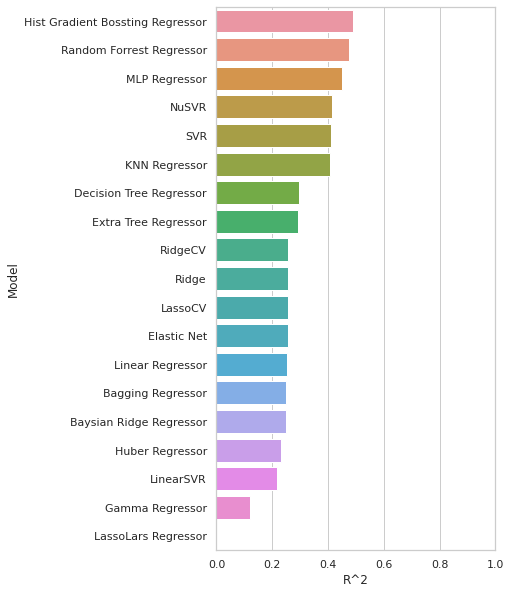

In [58]:
plt.figure(figsize = (5, 10))
sns.set_theme(style = "whitegrid")
ax = sns.barplot(y = report["Model"], x = "R^2", data = report)
ax.set(xlim = (0, 1))

[(0.0, 2.5)]

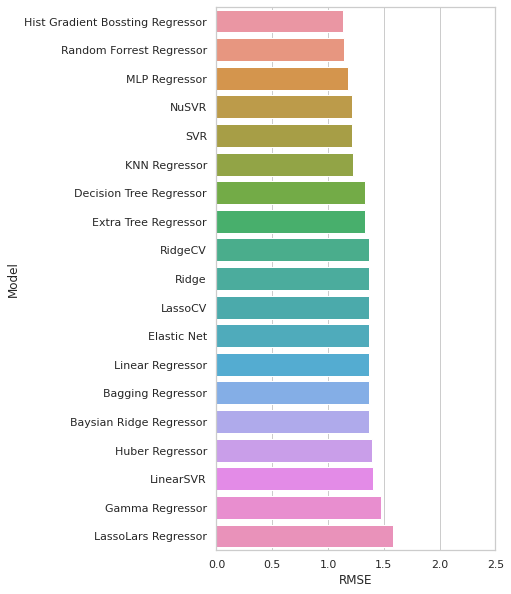

In [63]:
plt.figure(figsize = (5, 10))
sns.set_theme(style = "whitegrid")
ax = sns.barplot(y = report["Model"], x = "RMSE", data = report)
ax.set(xlim = (0, 2.5))